# ЛР_7(13) Нахождение и обработка контуров

In [44]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

In [45]:
def img_input(img_path, size=(0,0), type=1):
    img = cv2.imread(img_path,type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img

In [46]:
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

### Задание 7.1 С помощью функции cv2.findContours найти все контуры изображения.


In [47]:
image_rgb = img_input('pic/CatWithShadow2.jpg')
gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

Используем функцию с адаптивным порогом

In [48]:
image_blur = cv2.medianBlur(gray, 5)
thresh = cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

Определим контуры

In [49]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

Нарисуем все найденные контуры

In [50]:
img_with_contours = image_rgb.copy()
for contour in contours:
    cv2.drawContours(img_with_contours, contour, -1, (0,255,0), 2)

Выведем

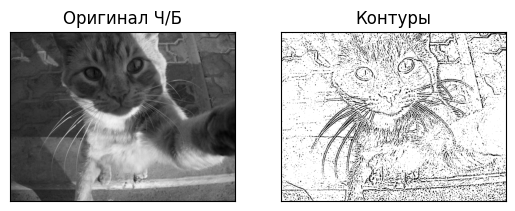

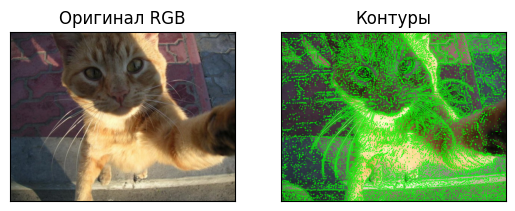

In [51]:
res1 = [gray, thresh]
title1 = ['Оригинал Ч/Б', 'Контуры']

img_print(res1, title1, hard_type='gray')

res2 = [image_rgb, img_with_contours]
title2 = ['Оригинал RGB', 'Контуры']

img_print(res2, title2)

### Задание 7.2. Протестировать функцию поиска контура cv2.findContours с аргументом cv2.CHAIN_APPROX_SIMPLE, который экономит память.

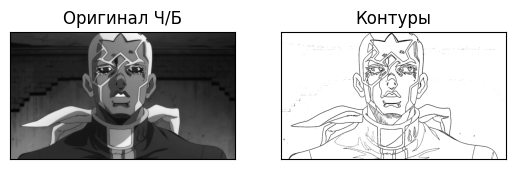

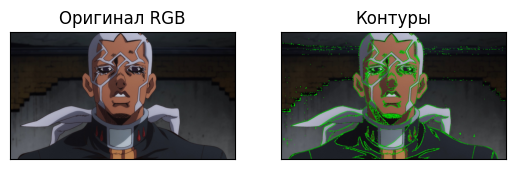

In [52]:
image_rgb = img_input('pic/jojo3.jpg')
gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

image_blur = cv2.medianBlur(gray, 5)
thresh = cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = image_rgb.copy()

for contour in contours:
    cv2.drawContours(img_with_contours, contour, -1, (0,255,0), 2)

res1 = [gray, thresh]
title1 = ['Оригинал Ч/Б', 'Контуры']

img_print(res1, title1, hard_type='gray')

res2 = [image_rgb, img_with_contours]
title2 = ['Оригинал RGB', 'Контуры']

img_print(res2, title2)

Задание 7.3 Выделить границу методом Канни

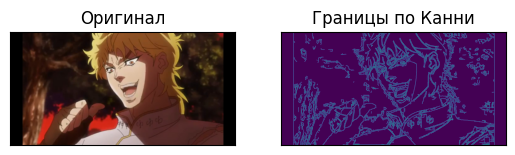

In [53]:
image = img_input('pic/jojo4.jpg')

edges = cv2.Canny(image, 47, 0, apertureSize = 3)

res = [image, edges]
title = ['Оригинал', 'Границы по Канни']

img_print(res, title)